<a href="https://colab.research.google.com/github/VAISHNAVI02210/Oasisinfobyte/blob/main/Exploratory_Data_Analysis_(EDA)_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Oasisinfobyte Internship**

TASK 1: Exploratory Data Analysis (EDA) task 1

AUTHOR: Vaishnavi Kale

BATCH:  JANUARY Phase 1 AICTE OIB-SIP 2025.

**AIM**

The aim of Exploratory Data Analysis (EDA) on a retail dataset is to analyze and summarize the key characteristics of the data, uncover patterns, relationships, and insights, identify any anomalies or outliers, and guide further data preprocessing for better decision-making in retail strategies. It involves visualizing data distributions, identifying trends in sales, customer behavior, and product performance to support business decisions.




In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = ('/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv') # Adjust path if necessary
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
# Check for missing values
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
# Check the distribution of categorical columns (if any)
data.select_dtypes(include='object').nunique()

Date                 345
Customer ID         1000
Gender                 2
Product Category       3
dtype: int64

In [ ]:
# Handle missing values

# Fill numeric columns with the mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill categorical columns with the mode (most frequent value)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)

# Drop duplicates if any
data.drop_duplicates(inplace=True)

# Verify the changes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
# Summary of numeric columns
data.describe()

# Unique values in categorical columns
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col} unique values:\n{data[col].value_counts()}\n")


Date unique values:
Date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-08-05     8
2023-02-05     8
              ..
2023-09-10     1
2023-02-16     1
2023-03-31     1
2023-01-25     1
2023-05-28     1
Name: count, Length: 345, dtype: int64

Customer ID unique values:
Customer ID
CUST001     1
CUST672     1
CUST659     1
CUST660     1
CUST661     1
           ..
CUST339     1
CUST340     1
CUST341     1
CUST342     1
CUST1000    1
Name: count, Length: 1000, dtype: int64

Gender unique values:
Gender
Female    510
Male      490
Name: count, dtype: int64

Product Category unique values:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64



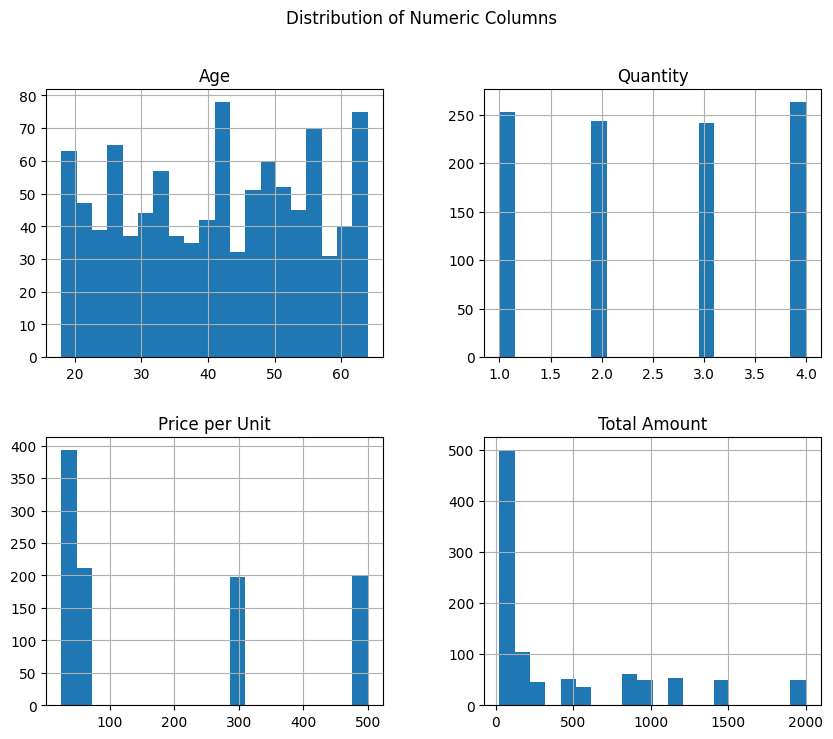

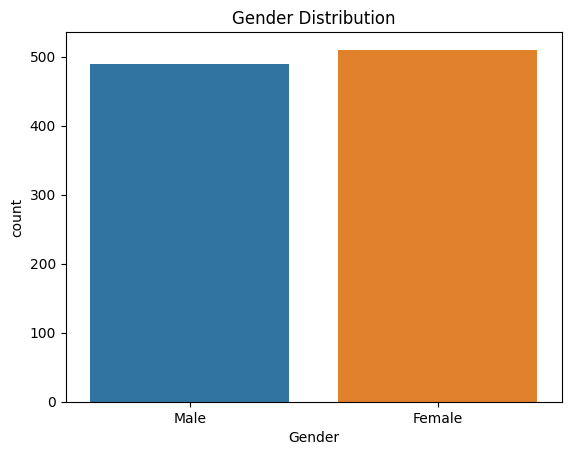

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of numeric columns
data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribution of Numeric Columns')
plt.show()

# Count plot for Gender
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution')
plt.show()


In [ ]:
# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot: Total Amount vs Age
sns.scatterplot(data=data, x='Age', y='Total Amount', hue='Gender')
plt.title('Total Amount vs Age by Gender')
plt.show()


ValueError: could not convert string to float: '2023-11-24'

<Figure size 800x600 with 0 Axes>

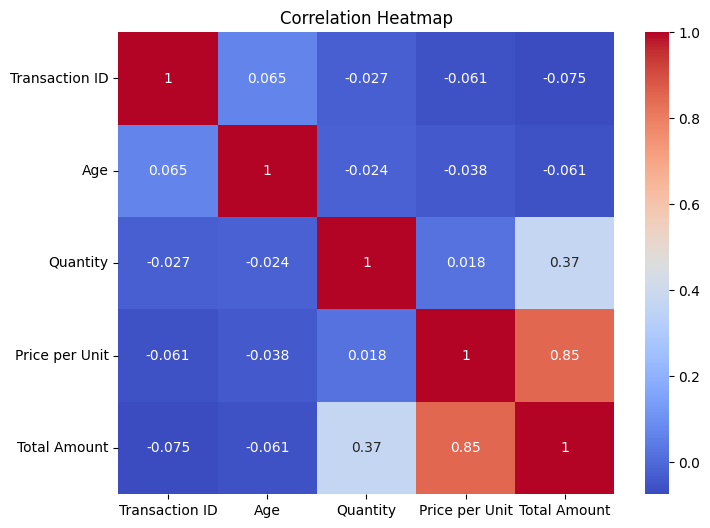

In [ ]:
# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


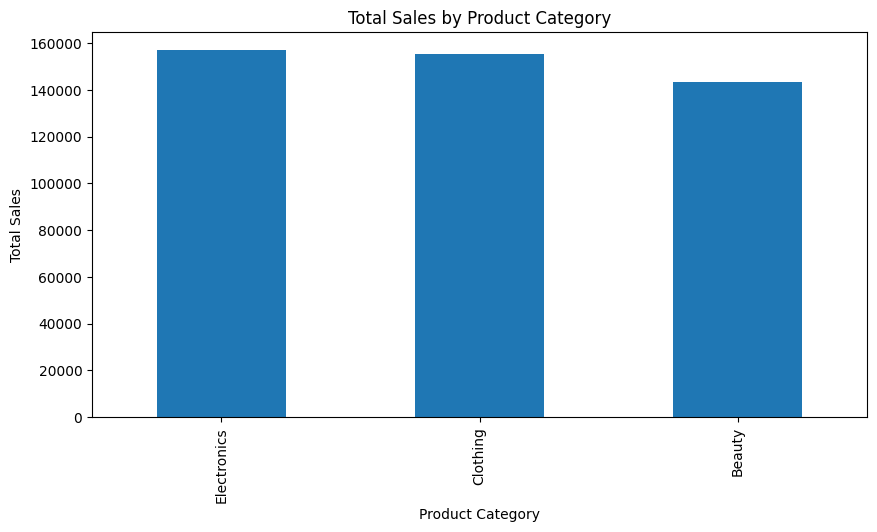

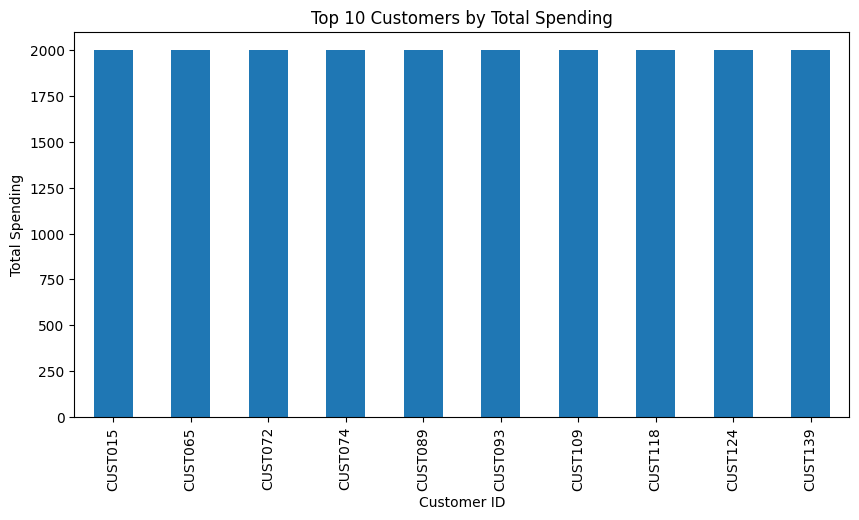

In [ ]:
# Total sales by product category
category_sales = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(10, 5))
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.show()

# Top 10 customers by total spending
top_customers = data.groupby('Customer ID')['Total Amount'].sum().nlargest(10)
top_customers.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Customers by Total Spending')
plt.ylabel('Total Spending')
plt.xlabel('Customer ID')
plt.show()


<Axes: xlabel='Month'>

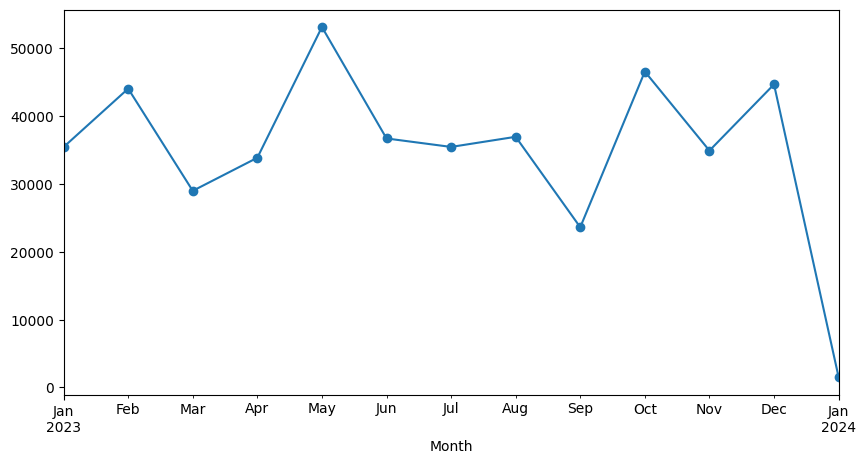

In [ ]:
# Convert the 'Date' column to datetime format if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Now you can extract the month as a period
data['Month'] = data['Date'].dt.to_period('M')

# Group by 'Month' and calculate total sales
monthly_sales = data.groupby('Month')['Total Amount'].sum()

# Plot the result
monthly_sales.plot(kind='line', marker='o', figsize=(10, 5))



In [ ]:
data.to_csv('/kaggle/working/retail_sales_dataset.csv', index=False)

